# 이미지 데이터 셋을 이용한 CNN Modeling
## Dogs and Cats Image_Data
* Train_Data : 2000(1000_Dogs, 1000_Cats)
* Valid_Data : 1000(500_Dogs, 500_Cats)
* Test_Data : 1000(500_Dogs, 500_Cats)

## Import Tensorflow & Keras

* TensorFlow Version 지정

In [10]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'1.15.0'

* GPU 설정 확인

In [11]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Tue Dec 31 00:57:40 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    32W / 250W |    265MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                          

* Keras Version 확인

In [12]:
import keras
keras.__version__

'2.2.5'

# I. Colab File Upload

> ## 1) 'dogs_and_cats_small.zip' 파일을 Colab에 업로드 후 진행
* 약 8분

In [13]:
!ls -l

total 88504
-rw-r--r-- 1 root root 90618980 Dec 31 00:47 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Dec 18 16:52 sample_data


> ## 2) unzip

In [14]:
!unzip dogs_and_cats_small.zip

Archive:  dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inflating: test/cats/cat.1525.jpg  
  inflating: tes

In [0]:
!ls -l

total 88732
-rw-r--r-- 1 root root 90837451 Dec 29 03:02 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Dec 18 16:52 sample_data
drwxr-xr-x 4 root root     4096 Dec 29 03:03 test
drwxr-xr-x 4 root root     4096 Dec 29 03:03 train
drwxr-xr-x 4 root root     4096 Dec 29 03:03 validation


# II. Data Preprocessing

> ## 1) Image_File Directory Setting

* train_dir
* validation_dir
* test_dir

In [0]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

> ## 2) ImageDataGenerator( )

* Normalization
 * ImageDataGenerator( )
* Resizing
 * flow_from_directory( )

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150), # resizing
                  batch_size = 20,
                  class_mode = 'binary') # labling 

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150), 
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## 3) Test train_generator

In [21]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


# III. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification

In [0]:
from keras import layers
from keras import models

model = models.Sequential(name = 'SimpleCNN')
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()
# 갯수가 많아진다. 펼쳐지면서 파라미터가 엄청 많아진다.

Model: "SimpleCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       14

> ## 2) Model Compile

* 모델 학습방법 설정

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * 약 8분

In [24]:
Hist_dandc = model.fit_generator(train_generator, # 서로 다른 크기의 이미지를 제너레이터 하면서 처리하기 때문에 fit_geverator함수를 쓴다.
                                 steps_per_epoch = 100, #100으로 되어있다. 트레인 데이터가 전부 들어오면 에포크 하나
                                 epochs = 60,
                                 validation_data = valid_generator,
                                 validation_steps = 50)




Epoch 1/60





100/100 [==============================] - 22s 216ms/step - loss: 0.7101 - acc: 0.5105 - val_loss: 0.6793 - val_acc: 0.6170
Epoch 2/60
100/100 [==============================] - 9s 90ms/step - loss: 0.6790 - acc: 0.6000 - val_loss: 0.6441 - val_acc: 0.6320
Epoch 3/60
100/100 [==============================] - 9s 89ms/step - loss: 0.6346 - acc: 0.6635 - val_loss: 0.5710 - val_acc: 0.7090
Epoch 4/60
100/100 [==============================] - 9s 90ms/step - loss: 0.5714 - acc: 0.7125 - val_loss: 0.6202 - val_acc: 0.6550
Epoch 5/60
100/100 [==============================] - 9s 89ms/step - loss: 0.5205 - acc: 0.7425 - val_loss: 0.5777 - val_acc: 0.7080
Epoch 6/60
100/100 [==============================] - 9s 90ms/step - loss: 0.4781 - acc: 0.7765 - val_loss: 0.5498 - val_acc: 0.7190
Epoch 7/60
100/100 [==============================] - 9s 90ms/step - loss: 0.4255 - acc: 0.7965 - val_loss: 0.5718 - val_acc: 0.7190
Epoch 8/60
100/100 [==============================] - 9s 89

> ## 4) 학습 결과 시각화

* Loss Visualization

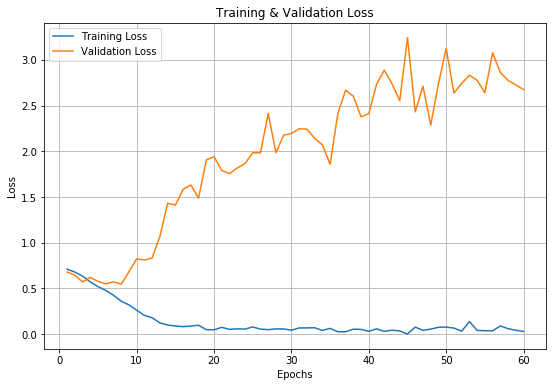

In [25]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')
# 데이터를 제너레이터 했다.

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [28]:
loss, accuracy = model.evaluate_generator(test_generator,
                                          steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 2.62542
Accuracy = 0.73000


# 여기까지가 102번 코드
# 
# 
# The End
# 
# 
# 여기서부터 103번 코드

In [29]:
# Keras 세션 초기화

keras.backend.clear_session()

# 데이터 증강(Augmentation)을 사용하여 CNN 학습
* Overfitting 대응책

> ## [Optional] Image Augmentation Test

* rotation_range = 40 : 0도에서 40도 사이에서 임의의 각도록 회전
* width_shift_range = 0.2 : 20% 픽셀 내외로 좌우 이동
* height_shift_range = 0.2 : 20% 픽셀 내외로 상하 이동
* shear_range = 0.2 : 0.2 라디안 내외로 시계 반대방향으로 변형
* zoom_range = 0.2 : 80%에서 120% 범위에서 확대/축소
* horizontal_flip = True : 수평방향 뒤집기
* vertical_flip = True : 수직방향 뒤집기
* fill_mode = 'nearest' : 주변 픽셀로 이미지 채우기

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             fill_mode = 'nearest')
# 이미지 data인 경우에만 해당한다. train data만 하면 된다. 

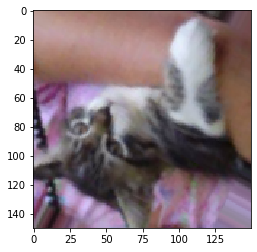

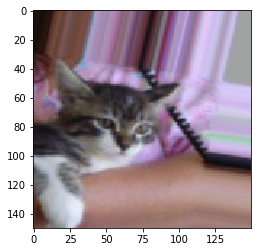

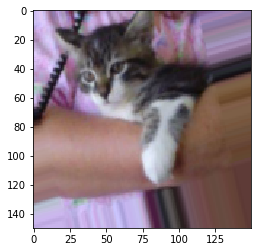

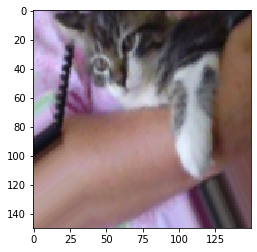

In [32]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

train_cats_dir = train_dir = os.path.join('train', 'cats')
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 테스트 이미지 선택
img_path = fnames[77]

# 이미지 읽고 크기 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 배열 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 변환
x = x.reshape((1,) + x.shape)

# 랜덤하게 변환된 이미지 배치 생성
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()
# 이미지를 변형시키는 것이다. ex) 방향을 바꾼다는지

# I. Data Preprocessing

> ## 1) Image_File Directory Setting

* train_dir
* validation_dir
* test_dir

In [0]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

> ## 2) ImageDataGenerator( )

* Normalization & Augmentaion
 * ImageDataGenerator( )
* Resizing
 * flow_from_directory( )

In [34]:
from keras.preprocessing.image import ImageDataGenerator

# With Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

# Without Augmentation 
valid_datagen = ImageDataGenerator(rescale = 1./255)



# With Augmentation
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

# Without Augmentation
valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# II. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification
 * Dropout Layer

In [35]:
from keras import layers
from keras import models

model = models.Sequential(name = 'imageAugment')
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(1 - 0.5)) # 이것을 추가해봄. 데이터를 증가하고 드랍아웃을 넣었다.
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [36]:
model.summary()

Model: "imageAugment"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

> ## 2) Model Compile

* 모델 학습방법 설정
 * optimizer : rmsprop -> adam

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', #rspm에서 adam으로 바꿔봤다.
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * epochs : 60 -> 100
 * 약 25분

In [38]:
Hist_dandc = model.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 100,
                                 validation_data = valid_generator,
                                 validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6969 - acc: 0.5235 - val_loss: 0.6942 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6946 - acc: 0.4980 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6925 - acc: 0.5055 - val_loss: 0.6893 - val_acc: 0.5420
Epoch 4/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6912 - acc: 0.5230 - val_loss: 0.6852 - val_acc: 0.5490
Epoch 5/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6913 - acc: 0.5250 - val_loss: 0.6925 - val_acc: 0.5140
Epoch 6/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6938 - acc: 0.5230 - val_loss: 0.6926 - val_acc: 0.5050
Epoch 7/100
100/100 [==============================] - 19s 185ms/step - loss: 0.6919 - acc: 0.5240 - val_loss: 0.6651 - val_acc: 0.5910
Epoch 8/100
100/100 [===========================

> ## 4) 학습 결과 시각화

* Loss Visualization

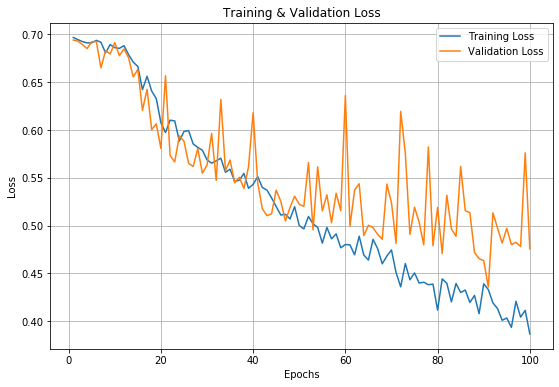

In [40]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [41]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [42]:
loss, accuracy = model.evaluate_generator(test_generator,
                                          steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.55523
Accuracy = 0.76200


# 
# 
# 
# The End
# 
# 
# 105번 코드


In [0]:
# Keras 세션 초기화

keras.backend.clear_session()

# 사전 학습된 CNN(VGG-16)을 이용한 Fine Tunig (끝만 바꿔준다.)
## VGG-16 Model
* University of Oxford - Visual Geometry Group
* 2014 ILSVRC 2nd Model
* ImageNet Large Scale Visual Recognition Challenge (ILSVRC)

transfer Learning보다는 Fine Tunig하는게 성능이 더 좋다.



# I. Image_File Directory Setting

* train_dir
* validation_dir
* test_dir

In [0]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

# II. Data Preprocessing

> ## 1) ImageDataGenerator( )

In [45]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# III. Import VGG-16 Model & Some Layers Freezing

> ## 1) conv_base

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

> ## 2) Model Information

In [47]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

> ## 3) 'block5_conv1' Freezing

* Before 'weight' Freezing

In [48]:
print('conv_base 동결 전 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))
#weight와 bias가 13종씩 존재한다.

conv_base 동결 전 훈련 가능 가중치의 종류: 26


* 'weight' Freezing

In [0]:
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        # 나머지는 다 freeze시키고 5부터는 아니다. 

* After 'weight' Freezing

In [50]:
print('conv_base 동결 후 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 후 훈련 가능 가중치의 종류: 6


In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# IV. Keras CNN Modeling with VGG-16 Freezed Layers

> ## 1) Model Define

* 'conv_base' & 'Classification' Network
* Dropout Layer

In [0]:
from keras import models, layers

model = models.Sequential(name = 'CNN_VGG16')
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(1 - 0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "CNN_VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정
 * 이미 학습된 Weight 값을 Tuning
 * 매우 작은 Learnig Rate 지정
 * optimizers.Adam(lr = 0.000005)

In [0]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000005), # 학습이 끝난 parameter들을 다시 학습시킬 때는 lr은 아주 작게 하는게 났다.
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * 약 15분

In [52]:
Hist_dandc = model.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 100,
                                 validation_data = valid_generator,
                                 validation_steps = 50)

RuntimeError: ignored

> ## 4) 학습 결과 시각화

* Loss Visualization

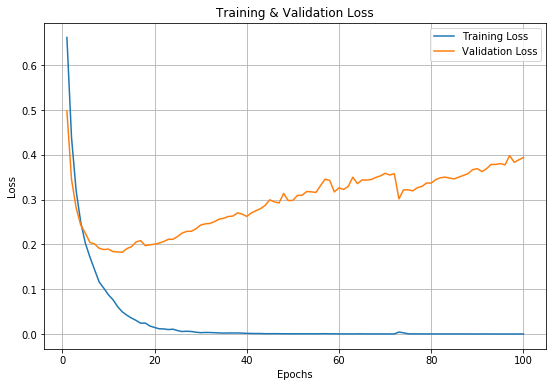

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [0]:
loss, accuracy = model.evaluate_generator(test_generator,
                                          steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.42093
Accuracy = 0.92600


# 
# 
# 
# The End
# 
# 
# 